Импортим всякое

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import seaborn_image as isns
import warnings
warnings.simplefilter('ignore')
import missingno as msn

Открываем наши драгоценные данные

In [2]:
df = pd.read_csv('11K.csv')

И убираем наши НЕ любимые данные

In [ ]:
del df['accommodation_type'] # Это тип хаты
del df['deal_type'] # Тип сделки, у нас только продажа
del df['residential_complex'] # Много пропущено и не особо надо
del df['heating_type'] # Подогрев, нигде не указан
del df['object_type'] # Чет ваще не нужная штука

Чистим

In [3]:
df_replaced = df.replace(-1,np.nan)
df_replaced = df_replaced.replace("-1",np.nan)
df_replaced = df_replaced.replace(-1.0,np.nan)
df_replaced = df_replaced.replace("-1.0",np.nan)
df_replaced.to_csv("cleaned_11K.csv", index=False)
# Ещё мы заходим в сохранённый файл и меняем ��� на 0, дабы избежать ошибок

Открываем чистейшие и крутые данные

In [2]:
df = pd.read_csv('cleaned_11K.csv')
dash_info = pd.read_csv('dash_info_fifth.csv')
dash_info.sort_values(["price_for_meter"], axis=0, ascending=[False], inplace=True)

Далее осталось курить анашу

Теперь раскажу и покажу откуда готовились данные для верхнего графика

In [5]:
list_of_cities = df['location'].unique()

def price_for_meter(location):
    city = df[df['location']==location]
    city_price = city['price'].sum()

    cleaned_data = [x.replace("м²", "").strip() for x in city['total_meters']]
    cleaned_data = [x.replace("-1", "0").strip() for x in cleaned_data]
    cleaned_data = [x.replace("���", "0").strip() for x in cleaned_data]
    cleaned_data = pd.to_numeric([x.replace(",", ".").strip() for x in cleaned_data]).sum() # здесь в 4 (на самом деле уже не надо) строчки мы
                                                                                            # максимально просто сортируем данные по квадратам квартир
    
    # cleaned_data = city['total_meters'].sum()
    return round(city_price/cleaned_data,2)

with open("dash_info_fourth.csv", 'w', newline='', encoding='UTF-8') as csvfile:
    fieldnames = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for city in list_of_cities:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

И всё, данные для графика готовы

Выводим графиксы для умного виду

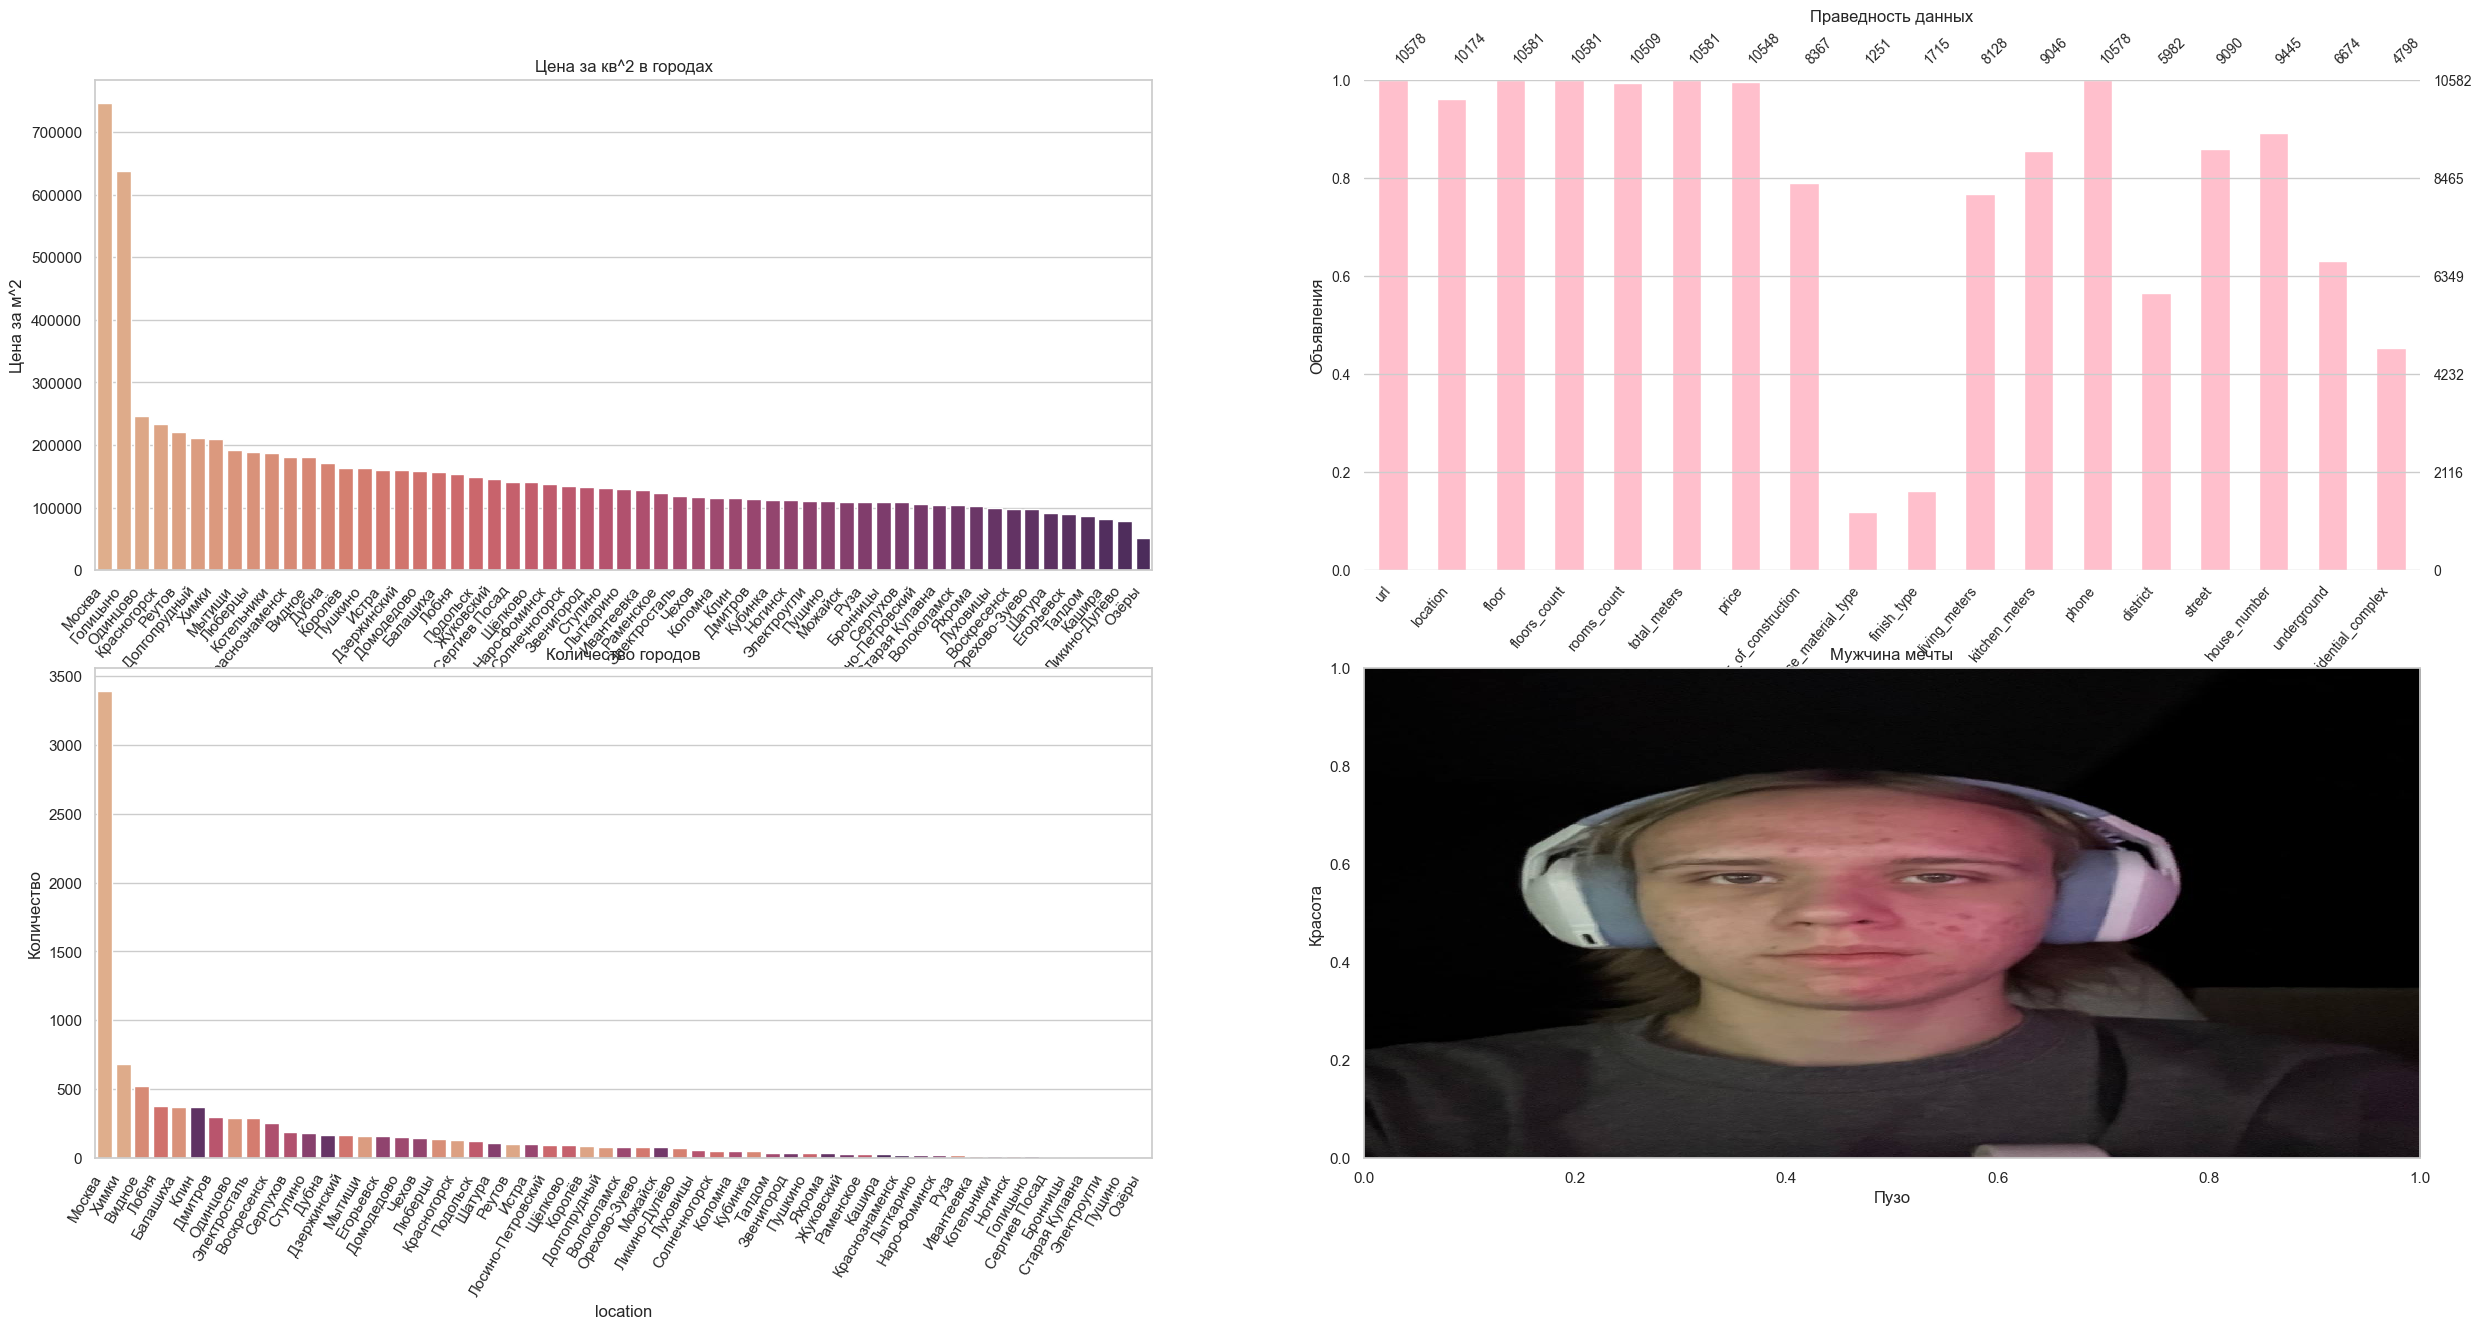

In [21]:
figs, axs = plt.subplots(2,2, figsize=(30,14))

sns.set_theme(style='whitegrid', palette='dark:pink')
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=dash_info, ax=axs[0,0], palette='flare')
axs[0,0].set_title('Цена за кв^2 в городах')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=50, ha='right')
axs[0,0].set_ylabel('Цена за м^2')
axs[0,0].set_xlabel('Города')

sns.set_theme(style='whitegrid', palette='dark:pink')
sns.countplot(x='location', hue='location', legend=False, data=df, ax=axs[1,0], order=df['location'].value_counts().index, palette='flare')
axs[1,0].set_title('Количество городов')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=60, ha='right')
axs[1,0].set_ylabel('Количество')

colours = ['#000000', '#ff0000'] 
# sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(colours), ax=axs[0,1])
msn.bar(df, ax=axs[0,1], fontsize=10, color=(1, 0.75, 0.8))
axs[0,1].set_title('Праведность данных')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=50, ha='right')
axs[0,1].set_ylabel('Объявления')
axs[0,1].set_xlabel('')
axs[0,1].grid(False)

bg_img = plt.imread('photo_2024-10-27_22-58-38.jpg')
axs[1,1].set_title('Мужчина мечты')
axs[1,1].imshow(bg_img, extent=[0, 1, 0, 1], aspect='auto')
axs[1,1].set_ylabel('Красота')
axs[1,1].set_xlabel('Пузо')
axs[1,1].grid(False)

plt.show()

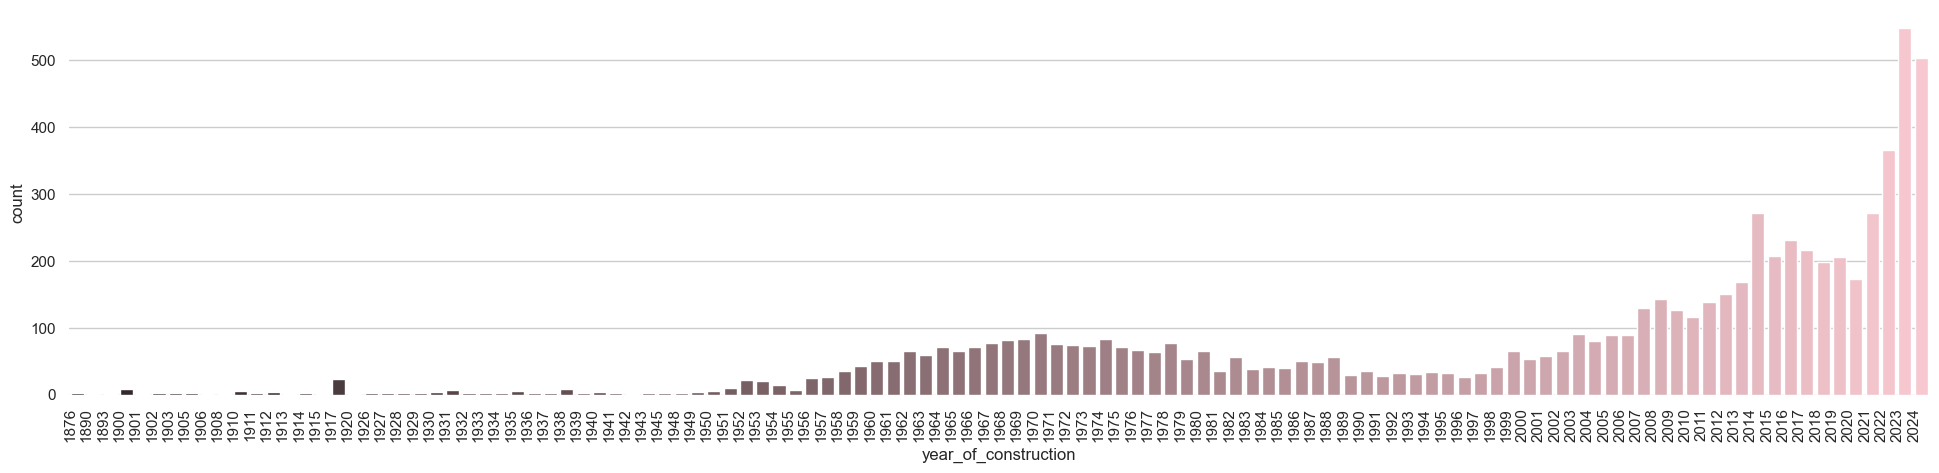

In [12]:
dash = pd.read_csv('years_count.csv')

plt.subplots(figsize=(24,5))

plot = sns.barplot(x='year_of_construction', y='count', data=dash, palette='dark:pink', orient='v')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, ha='right')
sns.despine(left=True, bottom=True)

plt.show()